In [218]:
pip install fbprophet

In [219]:
import fbprophet
import pandas as pd
import numpy as np

In [220]:
# load data
df = pd.read_csv('../input/datathon2022/train.csv')
df_test = pd.read_csv("../input/datathon2022/testFeatures.csv")
df_plt = df.copy()
df.drop(['ürün besin değeri', 'ürün kategorisi'], axis=1, inplace=True)

df.rename(columns={"tarih":"ds", "ürün": "urun", 'şehir': 'sehir', 'ürün üretim yeri': 'mensei', "ürün fiyatı":"y"}, inplace=True)
df_test.rename(columns={"tarih":"ds", "ürün": "urun", 'şehir': 'sehir', 'ürün üretim yeri': 'mensei'}, inplace=True)
df.head()

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns


In [223]:
df_plt.groupby(['ürün kategorisi'])['ürün fiyatı'].transform('mean')

In [224]:
df_plt['tarih'] =  pd.to_datetime(df_plt['tarih'], errors = 'coerce')
sns.relplot(x="tarih", y="ürün fiyatı", col_wrap=2, linewidth=1, height=6,
            col="ürün kategorisi", data=df_plt, kind="line");

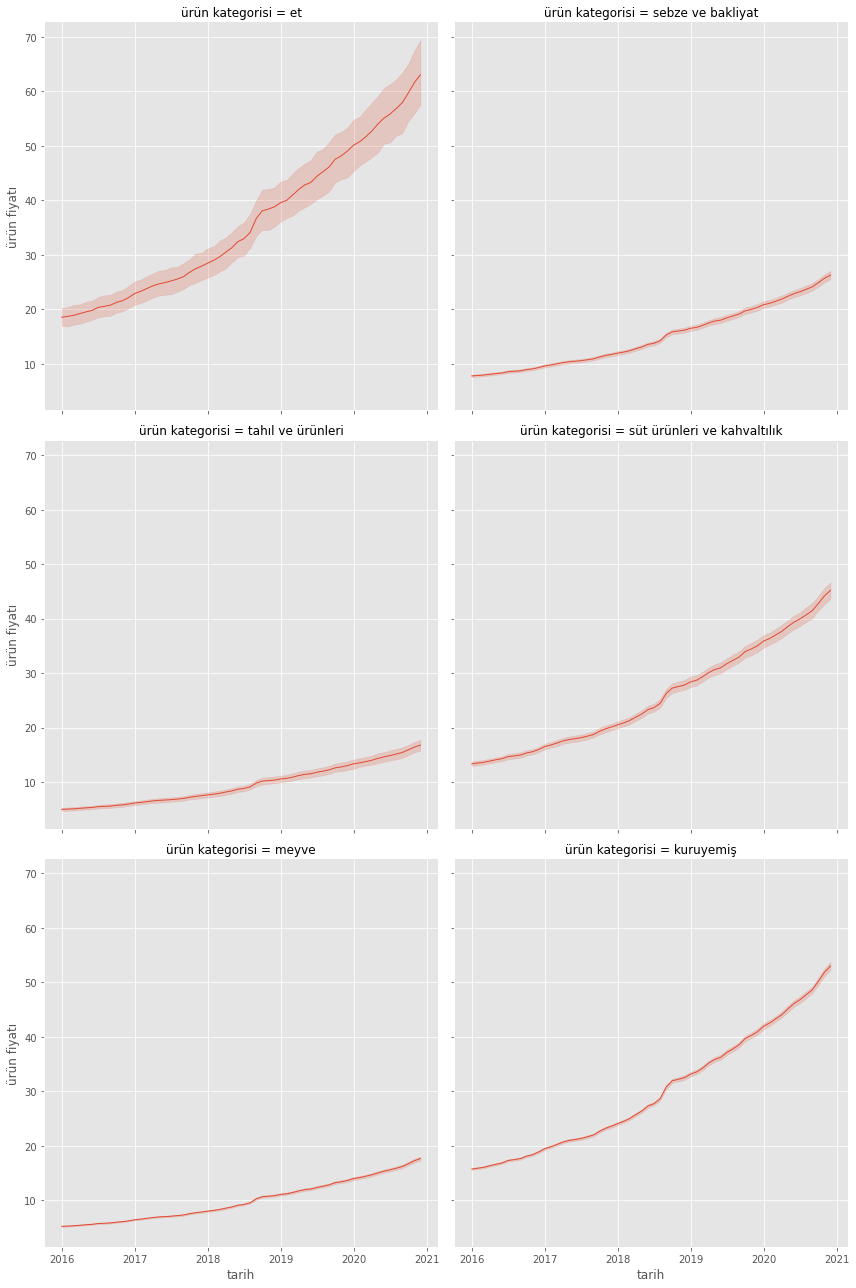

In [225]:
from fbprophet import Prophet
def run_prophet(timeserie):
    model = Prophet(seasonality_mode='multiplicative')
    model.fit(timeserie)
    forecast = model.make_future_dataframe(periods=12, freq='MS', include_history=False)
    forecast = model.predict(forecast)
    # fig = model.plot_components(forecast)
    # model.plot(forecast)
    # plt.show()
    return forecast

In [226]:
# Verideki tum zaman serileri icin prophet kullanarak tahmin yap
import matplotlib.pyplot as plt
from tqdm import tqdm
unique_rows = df.drop_duplicates(subset=['urun', 'market', 'sehir', 'mensei'])[['urun', 'market', 'sehir', 'mensei']]

for i, row in tqdm(unique_rows.iterrows()):
    urun, market, sehir, mensei = row.values
    df_temp = df[(df.urun == urun) & (df.market == market) & (df.sehir == sehir) & (df.mensei == mensei)].drop(['urun', 'market', 'sehir', 'mensei'], axis=1)
    
    f = run_prophet(df_temp)
    
    df_test.loc[(df.urun == urun) & (df.market == market) & (df.sehir == sehir) & (df.mensei == mensei), 'ürün fiyatı'] = f.yhat.values
    break

In [276]:
# 4000 tane time series oluşturuyorum aşağıda gösterdiğim örnekte sadece kıyma için 48 tane time series oluşturuluyor
# böylece ürünün sadece belli şehirdeki belli marketteki belli menşeili fiyatının time seriesi elimizde olmuş oluyor 

unique_rows[unique_rows.urun == 'kıyma'].head()
#örnek vermek gerekirse burada m marketinde a şehrinde menşeisi yurt içi olan kıyma için tüm zamanlarda gerçekleştirdiği değişimin
#prophet üzerinde bir time series ı var

In [228]:
#example of prophet model time series (one of 4000 time series)

![img](https://i.ibb.co/HthdZ0C/download.png)

In [229]:
df_prophet = pd.read_csv("../input/prophet-predictions/submission (1) (1).csv")

prophet modelimin çalışma süresi uzun sürdüğünden önceden sonuçlandırdığım csv dosyamı okudum.

In [230]:
df_test['ürün fiyatı'] = df_prophet['ürün fiyatı'] 

In [231]:
df_test_plt = df_test.copy()
df_test_plt['ds'] =  pd.to_datetime(df_test_plt['ds'], errors = 'coerce')

g = sns.relplot(x="ds", y="ürün fiyatı",col="ürün kategorisi",col_wrap=2, linewidth=1, height=6,
                data=df_test_plt, kind="line")

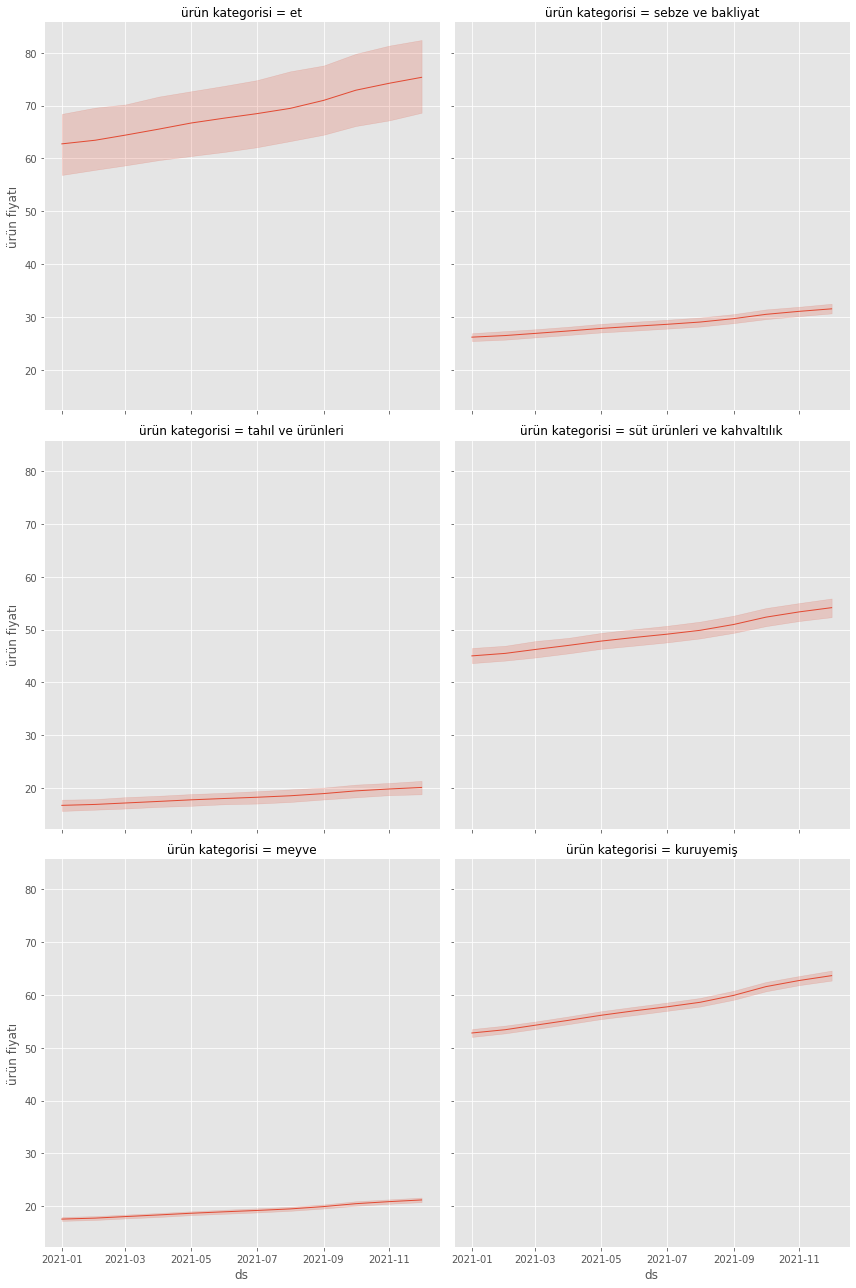

In [244]:
df_polynomial = pd.read_csv("../input/datathon2022/train.csv")
df_polynomial.drop(['ürün besin değeri','ürün üretim yeri','market','şehir'],axis=1,inplace=True)
df_polynomial = df_polynomial[df_polynomial['ürün kategorisi'] == 'et']
df_polynomial['tarih'].dt.year
df_polynomial['tarih'] =  pd.to_datetime(df_polynomial['tarih'], errors = 'coerce')
df_polynomial['x'] = (df_polynomial['tarih'].dt.year-2015)*df_polynomial['tarih'].dt.month

In [251]:
ax = sns.lmplot(x="x", y="ürün fiyatı", data=df_polynomial[df_polynomial['ürün'] == 'kıyma'],x_estimator=np.mean,logx=True)

Modelimizin verisinin hızlı artışının bir ürün üzerinden görüntüsü

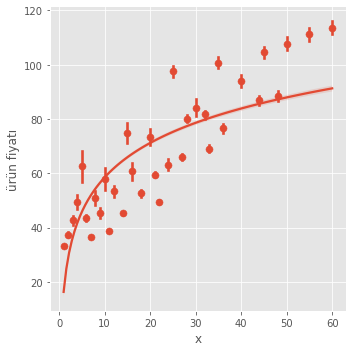

In [252]:
proph_test = df_test_plt['ürün fiyatı'].copy()

proph_test[5_000:10_000] += proph_test[5_000:10_000] * 0.06
proph_test[10_000:15_000] += proph_test[10_000:15_000] * 0.12
proph_test[15_000:20_000] += proph_test[15_000:20_000] * 0.21

proph_test[20_000:25_000] += proph_test[20_000:25_000] * 0.2
proph_test[25_000:30_000] += proph_test[25_000:30_000] * 0.27

proph_test[30_000:35_000] += proph_test[30_000:35_000] * 0.36
proph_test[35_000:] += proph_test[35_000:] * 0.45

df_test_plt2 = df_test_plt.copy()
df_test_plt2['ürün fiyatı'] = proph_test

In [253]:

g = sns.relplot(x="ds", y="ürün fiyatı",col="ürün kategorisi",col_wrap=2, linewidth=0.5, height=6,
                data=df_test_plt2, kind="line")

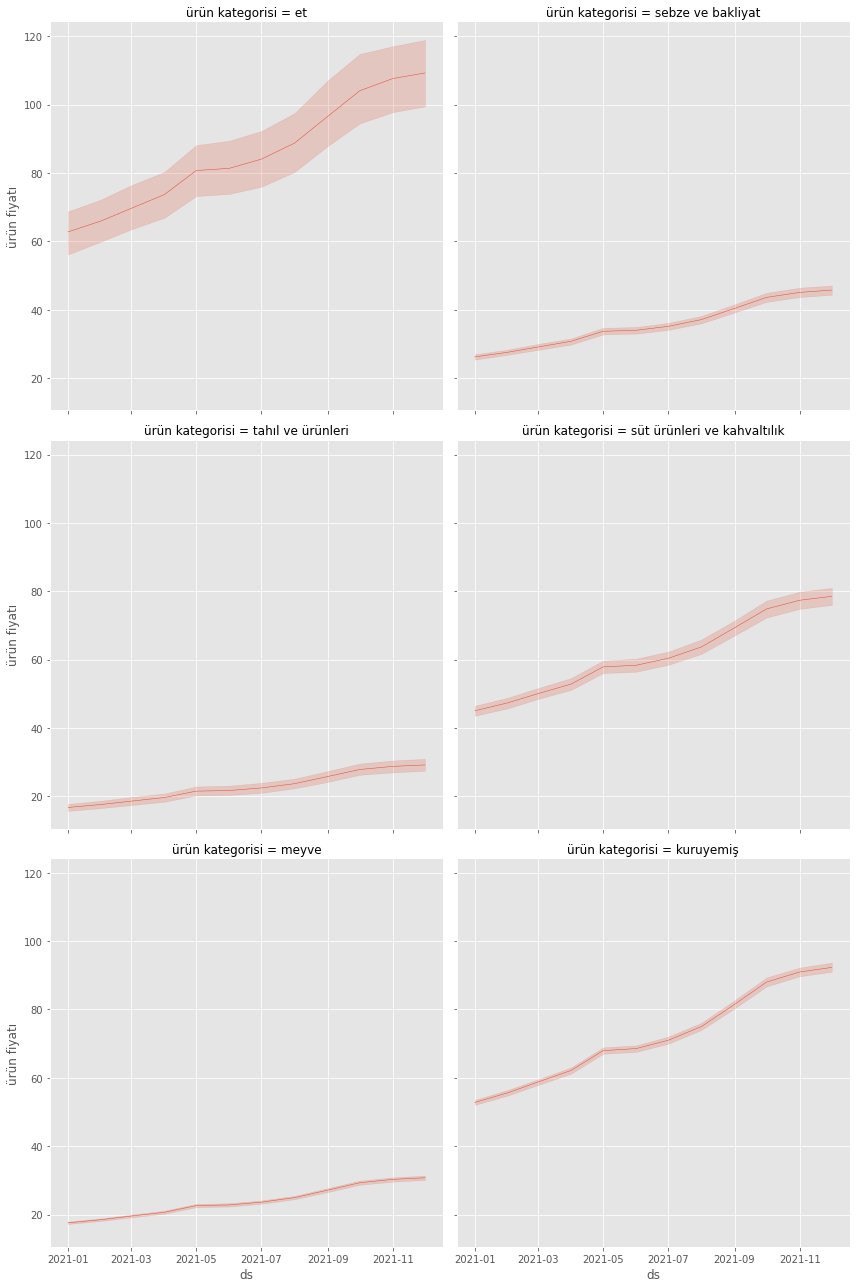

In [254]:
df_plt.rename(columns={"tarih":"ds", "ürün": "urun", 'şehir': 'sehir', 'ürün üretim yeri': 'mensei', "ürün fiyatı":"y"}, inplace=True)
df_test_plt.rename(columns={"tarih":"ds", "ürün": "urun", 'şehir': 'sehir', 'ürün üretim yeri': 'mensei', "ürün fiyatı":"y"}, inplace=True)
df_test_plt2.rename(columns={"tarih":"ds", "ürün": "urun", 'şehir': 'sehir', 'ürün üretim yeri': 'mensei', "ürün fiyatı":"y"}, inplace=True)


In [263]:
df_test_plt4 = pd.concat([df_plt,df_test_plt]).reset_index()

g = sns.relplot(x="ds", y="y",col="ürün kategorisi",col_wrap=2, linewidth=1, height=6,
                data=df_test_plt4, kind="line")

Modelimize çarpım eklemeden önceki görselleştirmesi

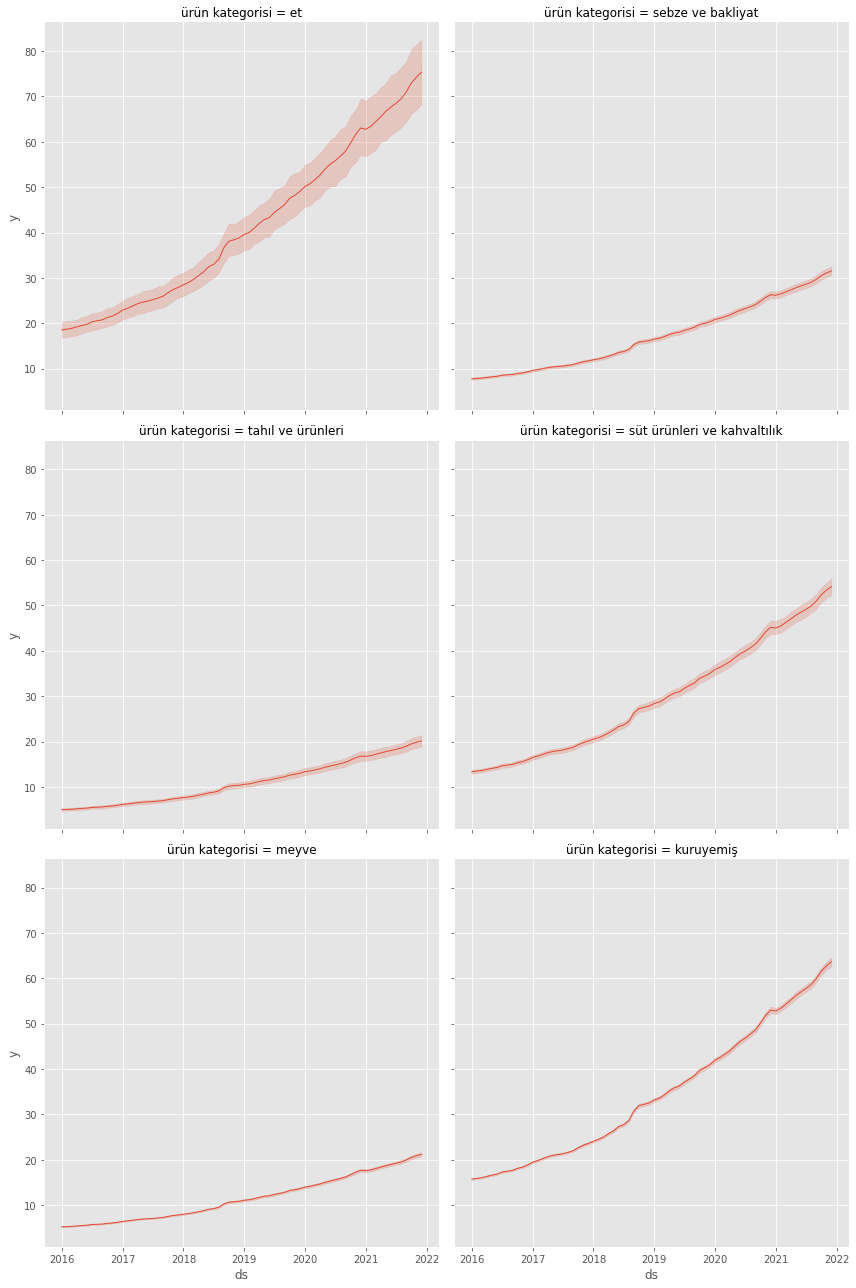

In [264]:
df_test_plt3 = pd.concat([df_plt,df_test_plt2]).reset_index()

g = sns.relplot(x="ds", y="y",col="ürün kategorisi",col_wrap=2, linewidth=0.5, height=6,
                data=df_test_plt3, kind="line")

Modelimize çarpım ekledikten sonraki grafiği


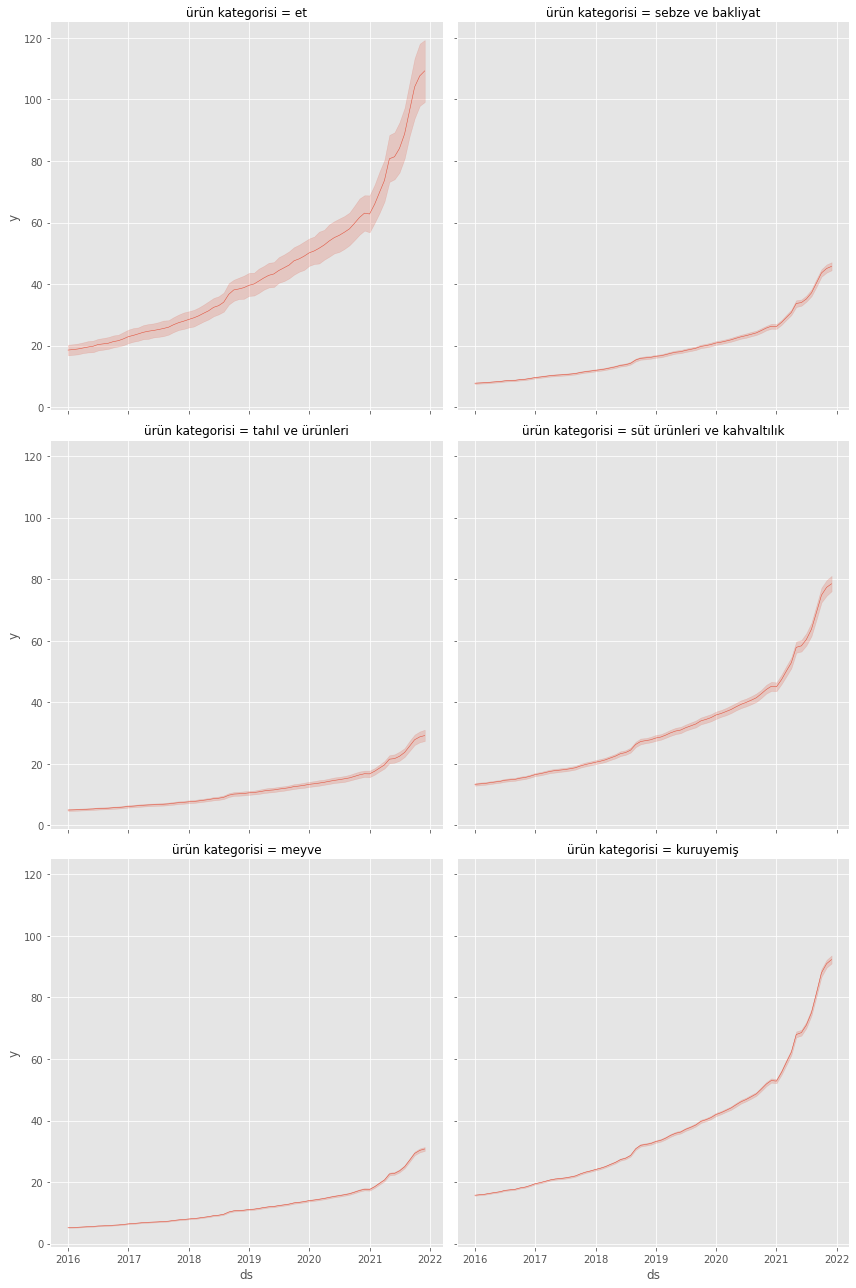

Modelimizin normal halini gördüğümüz zaman polynomial yapıyı öğrenemediği bu yüksekliği yakalamadığını görüyoruz.
böylelikle trende uygun olarak sayısal veri ekliyoruz.


In [259]:
df_test[["id", "ürün fiyatı"]]

In [260]:
submission = df_test[["id", "ürün fiyatı"]]

submission.to_csv("submission.csv", index=False)    

In [261]:
# Prophetin tahminleri lineer trend icin hazirlanmis
# Verideki polinom trendi tahminlere manuel olarak ekle

test_predictions = submission['ürün fiyatı'].copy()

test_predictions[5_000:10_000] += test_predictions[5_000:10_000] * 0.06
test_predictions[10_000:15_000] += test_predictions[10_000:15_000] * 0.12
test_predictions[15_000:20_000] += test_predictions[15_000:20_000] * 0.21

test_predictions[20_000:25_000] += test_predictions[20_000:25_000] * 0.2
test_predictions[25_000:30_000] += test_predictions[25_000:30_000] * 0.27

test_predictions[30_000:35_000] += test_predictions[30_000:35_000] * 0.36
test_predictions[35_000:] += test_predictions[35_000:] * 0.45

#test_labels = prev_sub['ürün fiyatı']

In [262]:
submission2 = submission.copy()
submission2["ürün fiyatı"] = test_predictions



In [275]:
submission2.to_csv("submission_prophet-with-trend2.csv", index=False)